In [24]:
def f_demo5(x):
    return x[0]**2+x[1]**2+x[2]**3+(1-x[3])**2,[],[x[0]**2+x[1]**2-1,x[0]**2+x[2]**2-1]

# Exercise 5, answers

## Problem 1

In [25]:
import numpy as np
import ad



#if k=0, returns the gradient of lagrangian, if k=1, returns the hessian
def diff_L(f,x,m,k):
    #Define the lagrangian for given m and f
    L = lambda x_: f(x_)[0] + (np.matrix(f(x_)[2])*np.matrix(m).transpose())[0,0]
    return ad.gh(L)[k](x)
#Returns the gradients of the equality constraints
def grad_h(f,x):
    return  [ad.gh(lambda y: 
            f(y)[2][i])[0](x) for i in range(len(f(x)[2]))] 

#Solves the quadratic problem inside the SQP method
def solve_QP(f,x,m):
    left_side_first_row = np.concatenate((
    np.matrix(diff_L(f,x,m,1)),
    np.matrix(grad_h(f,x)).transpose()),axis=1)
    left_side_second_row = np.concatenate((
    np.matrix(grad_h(f,x)),
    np.matrix(np.zeros((len(f(x)[2]),len(f(x)[2]))))),axis=1)
    right_hand_side = np.concatenate((
    -1*np.matrix(diff_L(f,x,m,0)).transpose(),
    -np.matrix(f(x)[2]).transpose()),axis = 0)
    left_hand_side = np.concatenate((
                                    left_side_first_row,
                                    left_side_second_row),axis = 0)
    temp = np.linalg.solve(left_hand_side,right_hand_side)
    return temp[:len(x)],temp[len(x):]
    
    

def SQP(f,start,precision):
    x = start
    m = np.ones(len(f(x)[2]))
    f_old = float('inf')
    f_new = f(x)[0]
    while abs(f_old-f_new)>precision:
        print x
        f_old = f_new
        (p,v) = solve_QP(f,x,m)
        x = x+np.array(p.transpose())[0]
        m = m+v
        f_new = f(x)[0]
    return x

In [26]:
x0 = [0.1,0.1,0.1,0.1]
x_opt = SQP(f_demo5,x0,0.00001)
print f_demo5(x_opt)

[0.1, 0.1, 0.1, 0.1]
[ 2.66904762  2.43095238  2.43095238  1.        ]
[ 1.43316532  1.31285412  1.31285412  1.        ]
[ 0.89811129  0.8391126   0.8391126   1.        ]
[ 0.7232535   0.72194696  0.72194696  1.        ]
[ 0.5275908   0.88728073  0.88728073  1.        ]
[ 3.07171309 -0.66247127 -0.66247127  1.        ]
[ 1.69814965 -0.33347293 -0.33347293  1.        ]
[ 1.13944518 -0.18745083 -0.18745083  1.        ]
[ 1.00162637 -0.13570611 -0.13570611  1.        ]
[ 0.993672   -0.11456882 -0.11456882  1.        ]
[ 0.9951009  -0.09994974 -0.09994974  1.        ]
[ 0.99614324 -0.08849291 -0.08849291  1.        ]
[ 0.99689678 -0.07926269 -0.07926269  1.        ]
[ 0.99745626 -0.07168508 -0.07168508  1.        ]
[ 0.99788143 -0.06536638 -0.06536638  1.        ]
[ 0.99821115 -0.06002606 -0.06002606  1.        ]
[ 0.99847142 -0.05545938 -0.05545938  1.        ]
[ 0.9986801  -0.05151381 -0.05151381  1.        ]
[ 0.99884973 -0.04807369 -0.04807369  1.        ]
[ 0.99898932 -0.04504989 -0.0

### What is going on in here?

* Many feasible solutions actually satisfy KKT conditions, but are not global optima


* In addition, the problem has multiple local but not global optima




In [27]:
x0 = [0.0,1.0,-1.0,1.0]
print f_demo5(x0)

(0.0, [], [0.0, 0.0])


Since we know that $x_4=1$ in the optimal solution and using the first constraint, we can write the problem as 
$$
\begin{align}
\min \qquad & x_3^3 + 1\\
\text{s.t.}\qquad &x_1^2+x_3^2=1\\
    &x\in\mathbb R^2
\end{align}
$$


In [28]:
import numpy as np
from pylab import meshgrid
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_2d_function(lb1,lb2,ub1,ub2,f):
    x = np.arange(lb1,ub1,0.1)
    y = np.arange(lb2,ub2,0.1)
    X,Y = meshgrid(x, y) # grid of point
    Z = [f([x,y]) for (x,y) in zip (X,Y)] # evaluation of the function on the grid
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z)
    return plt

In [29]:
def f_demo5b(x):
    return x[0]**3+1

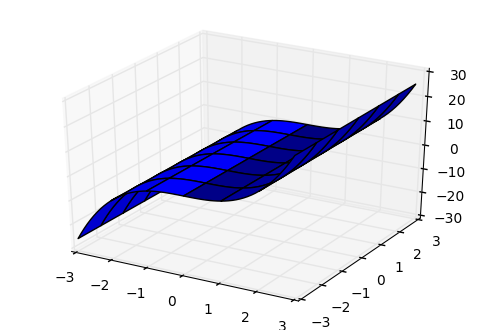

In [30]:
plot_2d_function(-3,-3,3,3,f_demo5b).show()

## Problem 2

In [31]:
def augmented_langrangian(f,x,mu,c):
    second_term = float(numpy.matrix(mu)*numpy.matrix(f(x)[2]).
                    transpose())
    third_term = 0.5*c*numpy.linalg.norm(f(x)[2])**2
    return f(x)[0]+second_term+third_term

In [40]:
from scipy.optimize import minimize
import numpy
def augmented_langrangian_method(f,start,mu0,c0):
    x_old = [float('inf')]*4
    x_new = start
    f_old = float('inf')
    f_new = f(x_new)[0]
    mu = mu0
    c = c0
#    while numpy.linalg.norm(f(x_new)[2])>0.000001:
    while abs(f_old-f_new)>0.000001:
        print x_new
        f_old = f_new
        res = minimize(lambda x:augmented_langrangian(f,x,mu,c),x_new)
        x_old = x_new
        mu = mu+c*numpy.matrix(f(res.x)[2])
        print mu
        x_new = res.x
        f_new = f(x_new)[0]
        c=2*c
    return x_new,c

In [42]:
x0 = [0.1,0.1,-0.1,0.1]
x_opt = augmented_langrangian_method(f_demo5,x0,[1,1],1)
print x_opt
print f_demo5(x_opt[0])

[0.1, 0.1, -0.1, 0.1]
[[  1.36868294e-12   2.24999807e+00]]
[ -1.16043201e-06  -1.48747984e-07  -1.49999936e+00   1.00000378e+00]
[[-0.99999924  0.24999807]]
[  7.81088290e-07  -7.07107049e-01  -1.01289847e-06   1.00000013e+00]
[[-1.00000105  1.76060131]]
[ -1.01639363e-07  -9.99999774e-01  -1.17373371e+00   1.00000185e+00]
[[-0.99999983  1.47276958]]
[  2.16772440e-06  -1.00000008e+00  -9.81845728e-01   9.99997472e-01]
[[-1.00000068  1.50133621]]
[  8.85284910e-08  -9.99999973e-01  -1.00089231e+00   9.99999079e-01]
[[-0.99999947  1.49996852]]
[ -1.89446411e-07  -1.00000002e+00  -9.99978630e-01   1.00000088e+00]
[[-0.99999624  1.49999728]]
[  6.11449437e-08  -1.00000003e+00  -1.00000022e+00   1.00000006e+00]
[[-0.99999814  1.50000191]]
(array([  6.07496173e-08,  -9.99999993e-01,  -1.00000002e+00,
         1.00000006e+00]), 256)
(-6.9107084220996876e-08, [], [-1.488183298814505e-08, 3.6150173077231784e-08])


## Problem 3

Now, the stability rule becomes
$$
(2x_1,2x_2)-\mu(1,1) = (0,0),
$$
and completementary rule becomes
$$
\mu(x_1+x_2-1) = 0.
$$
Thus, we need to have
$$
\left\{
\begin{align}
2x_1-\mu=0\\
2x_2-\mu=0\\
\mu(x_1+x_2-1) = 0.
\end{align}
\right.
$$
Now deducting equation (2), from equation (1) gives $2x_1-2x_2=0$, thus $x_1=x_2$.  Now if $\mu= 0$, then $x_1=x_2=0$. However, this solution is not feasible. Thus, $\mu\neq0$, which implies $x_1+x_2-1=0$, which gives $x_1=x_2=\frac12$ and, thus, $\mu=1$. These variables satisfy KKT conditions.

Because the problem is quadratic, it has an optimal solution. Since only solution satisfies KKT conditions, this solution optimal.

## Problem 4

Now,
$$
\begin{align}
\nabla_x L_c(x^*,\mu^*)& = \nabla f(x^*)+\sum_{k=1}^K \mu^*_k\nabla h_k(x^*)+c\nabla(\sum_{k=1}^Kh_k(x^*)^2)\\
&=\nabla f(x^*)+\sum_{k=1}^K \mu^*_k\nabla h_k(x^*)+2c\sum_{k=1}^Kh_k(x^*)\nabla h_k(x^*)\\
&=0+2c\sum_{k=1}^K0\nabla h_k(x^*)=0.
\end{align}
$$
The first zero is given by the KKT conditions and the second zero is due to the solution being feasible.